<a href="https://colab.research.google.com/github/erkoushik/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

#Dataset Loading


In [ ]:
path = '/content/drive/MyDrive/Data Projects/Hotel Booking Analysis/Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe(include = 'object')

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status  
count        119390        119390             119390  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104641         89613              75166

In [ ]:
for col in df.describe(include='object').columns :
  print(col)
  print(df[col].unique())
  print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['company','agent'], axis=1 ,inplace= True)
df.dropna(inplace= True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  118898.000000  118898.000000      118898.000000   
mean        0.371352     104.311435        2016.157656   
std         0.483168     106.903309           0.707459   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118898.000000              118898.000000   
mean                  27.166555                  15.800880   
std                   13.589971                   8.780324   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118898.000000         118898.000000  118898.000000   
mean                  0.928897              2.502145       1.858391   
std                   0.996216              1.900168       0.578576   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      55.000000   

            children         babies  is_repeated_guest  \
count  118898.000000  118898.000000      118898.000000   
mean        0.104207       0.007948           0.032011   
std         0.399172       0.097380           0.176029   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118898.000000                   118898.000000   
mean                 0.087142                        0.131634   
std                  0.845869                        1.484672   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    118898.000000         118898.000000  118898.000000   
mean          0.221181              2.330754     102.003243   
std           0.652785             17.630452      50.485862   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      70.000000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                118898.000000              118898.000000  
mean                      0.061885                   0.571683  
std                       0.244172                   0.792678  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

In [ ]:
df = df[df['adr']<5000]

### Data Analysis and Visualizations

In [ ]:
cancelled_percentage = df['is_canceled'].value_counts(normalize= True)
cancelled_percentage

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

In [ ]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

### Dataset Rows & Columns count

In [ ]:
print(df.index)
print('\n')
print(df.columns)

RangeIndex(start=0, stop=119390, step=1)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


#### Duplicate Values

In [ ]:
#Dataset Duplicate Value Count we use drop function drop.duplicate to delete duplicate 
df.drop_duplicates(inplace=True)

# total row here = 119390, duplicates row = 31994
uni_num_of_rows = df.shape[0]

# now we can check  unique rows 
uni_num_of_rows


87396

In [ ]:
# now view unique data
df.reset_index()

index         hotel  is_canceled  lead_time  arrival_date_year  \
0           0  Resort Hotel            0        342               2015   
1           1  Resort Hotel            0        737               2015   
2           2  Resort Hotel            0          7               2015   
3           3  Resort Hotel            0         13               2015   
4           4  Resort Hotel            0         14               2015   
...       ...           ...          ...        ...                ...   
87391  119385    City Hotel            0         23               2017   
87392  119386    City Hotel            0        102               2017   
87393  119387    City Hotel            0         34               2017   
87394  119388    City Hotel            0        109               2017   
87395  119389    City Hotel            0        205               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
87391             August                        35                         30   
87392             August                        35                         31   
87393             August                        35                         31   
87394             August                        35                         31   
87395             August                        35                         29   

       stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  \
0                            0                     0  ...    No Deposit   
1                            0                     0  ...    No Deposit   
2                            0                     1  ...    No Deposit   
3                            0                     1  ...    No Deposit   
4                            0                     2  ...    No Deposit   
...                        ...                   ...  ...           ...   
87391                        2                     5  ...    No Deposit   
87392                        2                     5  ...    No Deposit   
87393                        2                     5  ...    No Deposit   
87394                        2                     5  ...    No Deposit   
87395                        2                     7  ...    No Deposit   

       agent  company days_in_waiting_list customer_type     adr  \
0        NaN      NaN                    0     Transient    0.00   
1        NaN      NaN                    0     Transient    0.00   
2        NaN      NaN                    0     Transient   75.00   
3      304.0      NaN                    0     Transient   75.00   
4      240.0      NaN                    0     Transient   98.00   
...      ...      ...                  ...           ...     ...   
87391  394.0      NaN                    0     Transient   96.14   
87392    9.0      NaN                    0     Transient  225.43   
87393    9.0      NaN                    0     Transient  157.71   
87394   89.0      NaN                    0     Transient  104.40   
87395    9.0      NaN                    0     Transient  151.20   

      required_car_parking_spaces  total_of_special_requests  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          1   
...                           ...           

#### Missing Values/Null Values


In [ ]:
# Missing Values/Null Values Count then now we can replace all null values
null_values = df.isnull() == True
df.fillna(np.nan,inplace = True)
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [ ]:
# Visualizing missing values now we can check count of null valueies indiduavl columns
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


## What did you know about your dataset?

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.Includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The dataset contains a total of 119390 rows and 32 columns.Dataset Contains duplicated items i.e 31944 which is removed later .In this dataset we find data types of every columns i.e (Int, float ,string) and observe that some columns data types is not accurate and remove later .We find unique value of every columns it means what actual values in every columns

## ***2. Understanding Your Variables***

Let's see all the columns.

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#lets describe all data insights

In [ ]:
df.describe()

is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87396.000000          87396.000000  87396.000000   
mean                  1.005263              2.625395      1.875795   
std                   1.031921              2.053584      0.626500   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87392.000000  87396.000000       87396.000000            87396.000000   
mean       0.138640      0.010824           0.039075                0.030413   
std        0.455881      0.113597           0.193775                0.369145   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    87396.000000     87396.000000  75203.000000   
mean                         0.183990         0.271603     94.138306   
std                          1.731894         0.727245    113.188172   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    240.000000   
max                         72.000000        21.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  5259.000000          87396.000000  87396.000000   
mean    183.081384              0.749565    106.337246   
std     130.557608             10.015731     55.013953   
min       6.000000              0.000000     -6.380000   
25%      47.000000              0.000000     72.000000   
50%     169.000000              0.000000     98.100000   
75%     263.000000              0.000000    134.000000   
max     543.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 87396.000000               87396.000000  
mean                      0.084226                   0.698567  
std                       0.281533                   0.831946  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000  

### Variables Description 

**description** of individual  variable
The columns and the data it represents are listed below:

**hotel** : Name of the hotel (Resort Hotel or City Hotel)

**is_canceled** : If the booking was canceled (1) or not (0)

**lead_time**: Number of days before the actual arrival of the guests

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of month arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

**stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

**adults** : Number of adults among guests

**children** : Number of children among guests

**babies** : Number of babies among guests

**meal** : Type of meal booked

**country** : Country of guests

**market_segment** : Designation of market segment

**distribution_channel** : Name of booking distribution channel

**is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved

**assigned_room_type** : Code of room type assigned

**booking_changes** : Number of changes/amendments made to the booking

**deposit_type** : Type of the deposit made by the guest

**agent** : ID of travel agent who made the booking

**company** : ID of the company that made the booking

**days_in_waiting_list** : Number of days the booking was in the waiting list

**customer_type** : Type of customer, assuming one of four categories

**adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer

**reservation_status** : Reservation status (Canceled, Check-Out or No-Show)

**reservation_status_date** : Date at which the last reservation status was updated


## checking the unique values of each variable

In [ ]:
for element in df.columns.tolist():
  print("No.of unique values in",element,"is",df[element].nunique())

No.of unique values in hotel is 2
No.of unique values in is_canceled is 2
No.of unique values in lead_time is 479
No.of unique values in arrival_date_year is 3
No.of unique values in arrival_date_month is 12
No.of unique values in arrival_date_week_number is 53
No.of unique values in arrival_date_day_of_month is 31
No.of unique values in stays_in_weekend_nights is 17
No.of unique values in stays_in_week_nights is 35
No.of unique values in adults is 14
No.of unique values in children is 5
No.of unique values in babies is 5
No.of unique values in meal is 5
No.of unique values in country is 177
No.of unique values in market_segment is 8
No.of unique values in distribution_channel is 5
No.of unique values in is_repeated_guest is 2
No.of unique values in previous_cancellations is 15
No.of unique values in previous_bookings_not_canceled is 73
No.of unique values in reserved_room_type is 10
No.of unique values in assigned_room_type is 12
No.of unique values in booking_changes is 21
No.of uniq

In [ ]:
#lets check the unique value of hotel colum
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#lets check the arrival date month colum
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
#we vhecking now no of uniuqe values adults in column
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
# we check now no of unique values babies of column
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
# lest checking no of uniques values   is canceled column
df['is_canceled'].unique()

array([0, 1])

In [ ]:
#lets now checking no of unique values in arrival date of year
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
#lets checking no of unique values in agent
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
#lets now checking no of unique values market segments
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#lets now we are checking no of uniques values in meal
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

### **3.** **Data** **wrangling**

#Data cleaning

In [ ]:
# lets checking miss values columns  now we chech which columns is null value we have already sorted same
miss_values[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

In [ ]:
#lets  we check, what is the percentage of null value in each column, starting from company
percentage_company_null = miss_values[0] / uni_num_of_rows*100
percentage_company_null

93.98256213098998

In [ ]:
# now let's check for agent percentages' 

percentage_agent_null = miss_values[1] / uni_num_of_rows*100
percentage_agent_null

13.951439425145315

In [ ]:
# As we have seen, there is minimul null values in agent, Lets fill these value by taking mode of the all values
df['agent'].fillna(value = 0, inplace = True)
df['agent'].isnull().sum()
    

0

In [ ]:
#Check the percentage null value in country column

percentage_country_null = miss_values[2] / uni_num_of_rows*100
percentage_country_null

0.5171861412421621

In [ ]:
# We have less null vlues in country col, so we will replace null from 'other' as country name.

df['country'].fillna(value = 'others', inplace = True)

df['country'].isnull().sum()

0

In [ ]:
#Check the percentage null value in children col

percentage_children_null = miss_values[3] / uni_num_of_rows*100
percentage_children_null

0.004576868506567806

In [ ]:
# We have less null vlues in country col, so we will replace null from 0 as country name.

df['children'].fillna(value = 0, inplace = True)
df['children'].isnull().sum()

0

In [ ]:
#lets check now shapes
df.shape

(87396, 32)

In [ ]:
#let's check whether database having any other null value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                                 0
company                           82137


# change data type requred columns

In [ ]:
#lets check showing the info of the data to check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# We have seen that childer & agent column as datatype as float whereas it contains only int value, lets change datatype as 'int64'
df[['children', 'agent']] = df[['children', 'agent']].astype('int64')

#Additional new columns as per requirement 

In [ ]:
#total stay nights in days
df['total_stay_in_nights'] = df ['stays_in_week_nights'] + df ['stays_in_weekend_nights']
df['total_stay_in_nights']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay_in_nights, Length: 87396, dtype: int64

In [ ]:
# We have created a column for revenue using total stay * adr
df['revenue'] = df['total_stay_in_nights'] * df['adr']
df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87396, dtype: float64

In [ ]:
#  total guest coming for each booking
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df['total_guest'].sum()

176999

In [ ]:
# for understanding, from col 'is_canceled': we will replace the value from (0,1) to not_canceled, is canceled.

df['is_canceled'] = df['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])
df['is_canceled']

0         not canceled
1         not canceled
2         not canceled
3         not canceled
4         not canceled
              ...     
119385    not canceled
119386    not canceled
119387    not canceled
119388    not canceled
119389    not canceled
Name: is_canceled, Length: 87396, dtype: object

In [ ]:
#Same for 'is_repeated_guest' column
df['is_repeated_guest'] = df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])
df['is_repeated_guest']

0         not repeated
1         not repeated
2         not repeated
3         not repeated
4         not repeated
              ...     
119385    not repeated
119386    not repeated
119387    not repeated
119388    not repeated
119389    not repeated
Name: is_repeated_guest, Length: 87396, dtype: object

In [ ]:
#Now, we will check overall revenue hotel wise
hotel_wise_total_revenue = df.groupby('hotel')['revenue'].sum()
hotel_wise_total_revenue

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64

In [ ]:
#lets checking column of hotel and revenue 
df[['hotel', "revenue"]]

hotel  revenue
0       Resort Hotel     0.00
1       Resort Hotel     0.00
2       Resort Hotel    75.00
3       Resort Hotel    75.00
4       Resort Hotel   196.00
...              ...      ...
119385    City Hotel   672.98
119386    City Hotel  1578.01
119387    City Hotel  1103.97
119388    City Hotel   730.80
119389    City Hotel  1360.80

[87396 rows x 2 columns]

### What all manipulations have you done and insights you found?

What all manipulations have you done and insights you found?
We have done few manipulations in the Data.

----Addition of columns----

We have seen that there are few columns required in Data to analysis purpose which can be evaluated from the given columns.

a) Total Guests: This columns will help us to evaluate the volumes of total guest and revenue as well. We get this value by adding total no. of Adults, Children & babies.

b) Revenue: We find revenue by multiplying adr & total guest. This column will use to analyse the profit and growth of each hotel.

----Delete of columns----

a)company: As we have seen that this columns has almost Null data. so we have delete this column as this will not make any impact in the analysis.

----Replace of Values in columns----

a)is_canceled, is_not_canceled & is_repeated_guest: We have seen, that these columns contains only 0,1 as values which represent the status of booing cancellation. We replace these values (0,1) from 'Canceled' & 'Not canceled. In the same way for column 'is_repeated_guest', we replace 0,1 from 'Repeated' & 'Not repeated'. Now this values will help to make better understanding while visulization.

----Changes in data type of values in columns----

a)Agent & Children: We checked that these columns contains float values, which is not making any sense in data as this values repreasent the count of guest & ID of agent. So we have changed the data type of these columns from 'float' to 'Integer'.

----Removed is_null values & duplicate entries----

a)Before visualize any data from the data set we have to do data wrangling. For that, we have checked the null value in all the columns. After checking, when we are getting a column which has more number of null values, dropped that column by using the 'drop' method. In this way, we are dropped the 'company' column. When we are find minimal number of null values, filling thse null values with necesary values as per requirement by using .fillna().

b) In the same, we have checked if there is any duplicacy in data & we found that there are few rows have duplicate data. So we have removed those row from data set by using .drop_duplicates() method.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##chart 1

## plotting histogram

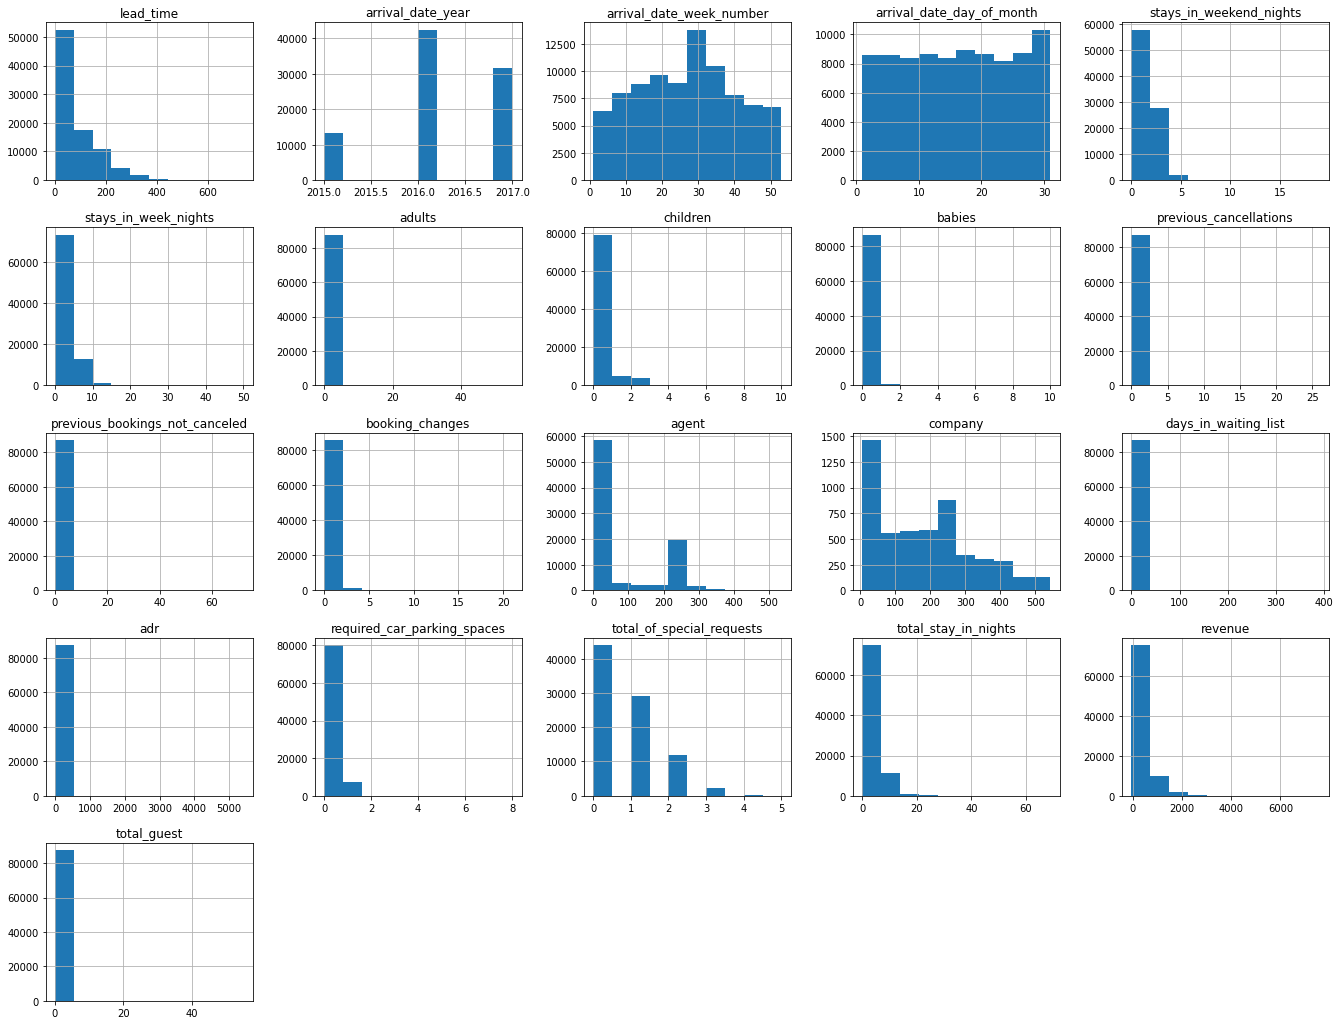

In [ ]:
#visulization code
df.hist(figsize=(23,18))
plt.show()

##1. Why did you pick the specific chart?

To understand the data clear way with proper insights ,i have used the histogram here. The histogram is a popular graping tool. it is used to summarised descrite data that are measured on an intraval scale

##2. What is/are the insight(s) found from the chart?

1.we can see that the maximum guest came in the year 2016

2.Maximum arrival week number is 30

3.Maximum arrival happen the last month

4.maximum guest come with no childrean

5.this is very less space for vehicle's parking

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Let's create a function which will give us bar chart of data respective with a col.
def get_count_from_column_bar(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd 

 # use to format the lable of x-axis

def plot_bar_chart_from_column(df, column_label, t1):
  df_grpd = get_count_from_column(df, column_label)
  fig, ax = plt.subplots(figsize=(25, 8))
  c= ['g','r','b','c','y']
  ax.bar(df_grpd['index'], df_grpd['count'], width = 0.6, align = 'edge', edgecolor = 'black', linewidth = 6, color = c, linestyle = ':', alpha = 0.6)
  plt.title(t1, bbox={'facecolor':'0.20', 'pad':6})
  plt.legend()
  plt.ylabel('Count')
  plt.xticks(rotation = 20) 
  plt.xlabel(column_label)
  plt.show()

In [ ]:
# Chart - 2 visualization code

def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# plot a pie chart from grouped data
def plot_pie_chart_from_column(df, column_label, t1, exp):
  df_grpd = get_count_from_column(df, column_label)
  fig, ax = plt.subplots(figsize=(20,8))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%',startangle=90,shadow=True, labeldistance = 1, explode = exp)
  plt.title(t1, bbox={'facecolor':'0.20', 'pad':6})
  ax.axis('equal')
  plt.legend()
  plt.show()  


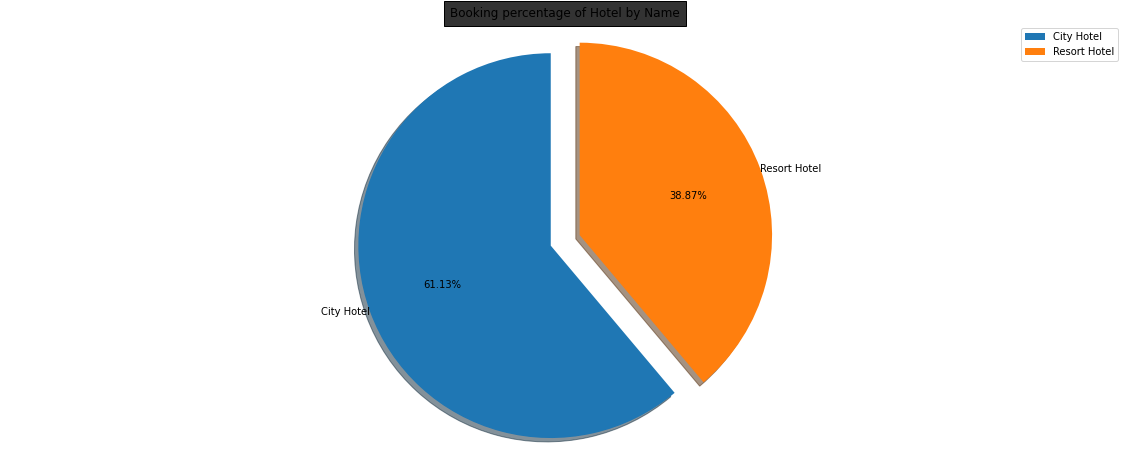

In [ ]:
exp1 = [0.08,0.08]
plot_pie_chart_from_column(df, 'hotel', 'Booking percentage of Hotel by Name', exp1)

##### 1. Why did you pick the specific chart?

*To present the data that in which hotel more booking have been done

##### 2. What is/are the insight(s) found from the chart? 
Here, we found that the booking number is Higher in City Hotel which is 61.12% than Resort Hotel which is 38.87%. Hence we can say that City hotel has more consumption*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, for both Hotels, this data making some positive business impact : -

City Hotel :- Provided more services to attract more guest to increase more revenue.

Resort Hotel :- Find solution to attract guest and find what city hotel did to attract guest.

#### Chart - 3

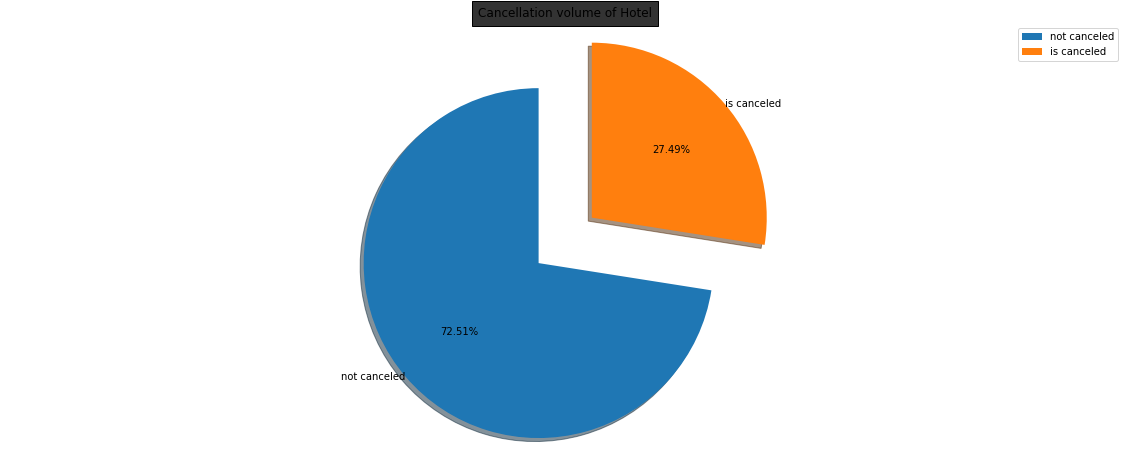

In [ ]:
# Chart - 3 visualization code
exp4 = [0,0.4]
plot_pie_chart_from_column(df, 'is_canceled', 'Cancellation volume of Hotel', exp4)
     


##### 1. Why did you pick the specific chart?

In this chart, we presented the cancellation rate of the hotels booking

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we can see, that more than 27% booking getting cancelled.

Solution: We can check the reason of cancellation of a booking & need to get this sort on business level

#### Chart - 4

Text(0.5, 0, 'week numbers')

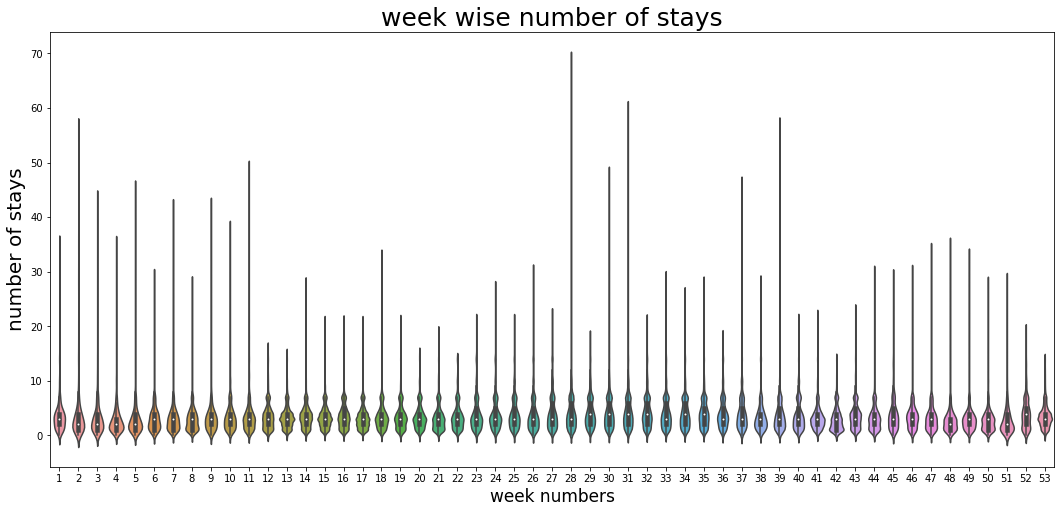

In [ ]:
# chart 4
#we are adding plotted chartof total stay 

df['total_stay_in_nights'] = df ['stays_in_week_nights'] + df ['stays_in_weekend_nights']
plt.figure(figsize=(18,8))
sns.violinplot(x="arrival_date_week_number",y="total_stay_in_nights", data= df)
plt.title("week wise number of stays", fontsize = 25),
plt.ylabel("number of stays",fontsize = 20)
plt.xlabel("week numbers",fontsize = 17)

## chart-5

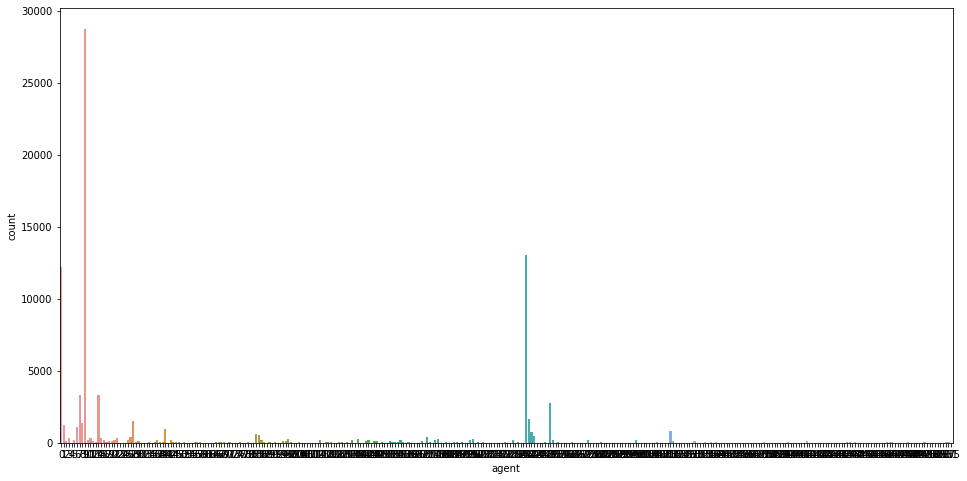

In [ ]:
#chart 5
#visualization code
plt.figure( figsize=(16, 8))

sns.countplot(x = df['agent'])
plt.show()

##### 1. Why did you pick the specific chart?

it shows counts observation in each catagorial bars  a count plot can be thought of as histogram across a catagorial, instead of qualitatives


#### Chart - 6

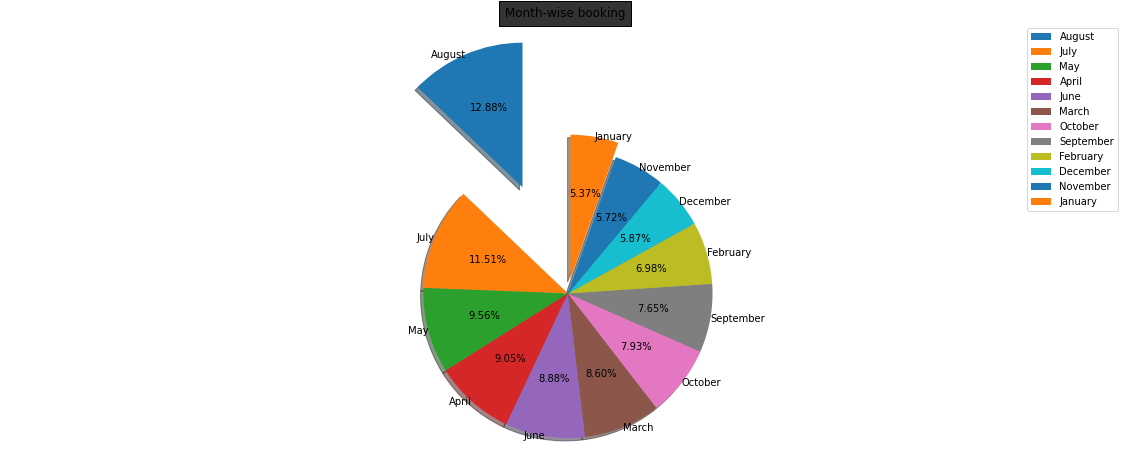

In [ ]:
# Chart - 6 visualization code
exp2 = [0.8, 0,0,0,0,0,0,0,0,0,0,0.10]
plot_pie_chart_from_column(df, 'arrival_date_month', 'Month-wise booking', exp2)
     

##### 1. Why did you pick the specific chart?

To show the percentage share of booking in each month,on overall level



##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, with increased volume of visitors will help hotel to manage revenue in down time, will also help employee satisfaction and retention.

#### Chart - 7

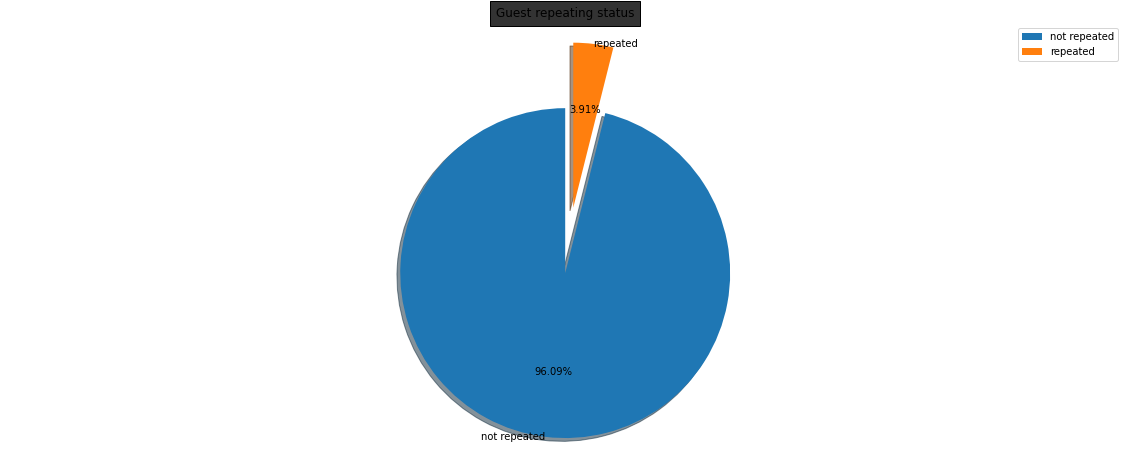

In [ ]:
# Chart - 7 visualization code
exp3 = [0,0.4]
plot_pie_chart_from_column(df, 'is_repeated_guest', 'Guest repeating status', exp3)


##### 1. Why did you pick the specific chart?

To show the percentage share of repeated & non-repeated guests.

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that the number of repeated guests is very less as compared to overall guests

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can give alluring offers to non-repetitive customers during Off seasons to enhance revenue

#### Chart - 8

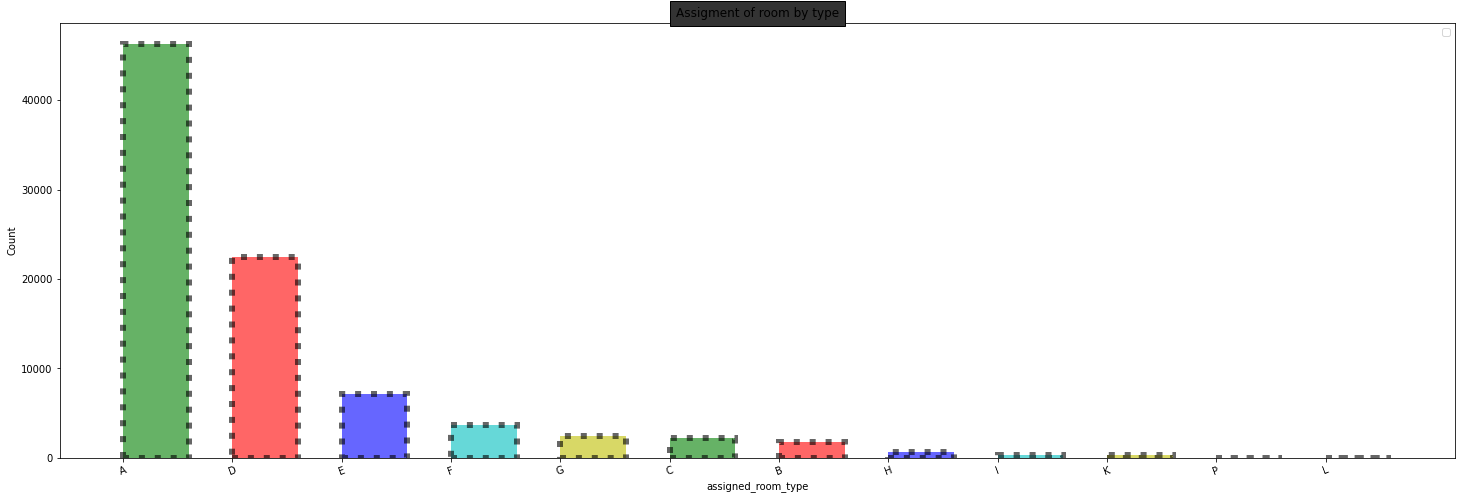

In [ ]:
# Chart - 8 visualization code
plot_bar_chart_from_column(df, 'assigned_room_type', 'Assigment of room by type')

##### 1. Why did you pick the specific chart?

To show distribution by volume, which room is alotted.

##### 2. What is/are the insight(s) found from the chart?

This chart shows room type 'A' is most prefered by guest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Positive impact because 'A','D','E' is more prefered by guest due to better services offered in room type.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
guest_month_wise = pd.DataFrame(df[['arrival_date_month', 'total_guest']])
guest_month_wise_df = guest_month_wise.groupby(['arrival_date_month'])['total_guest'].sum()
guest_month_wise_df.sort_values(ascending = False, inplace = True)

In [ ]:
df['total_guest']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: total_guest, Length: 87396, dtype: int64

<Axes: xlabel='market_segment'>

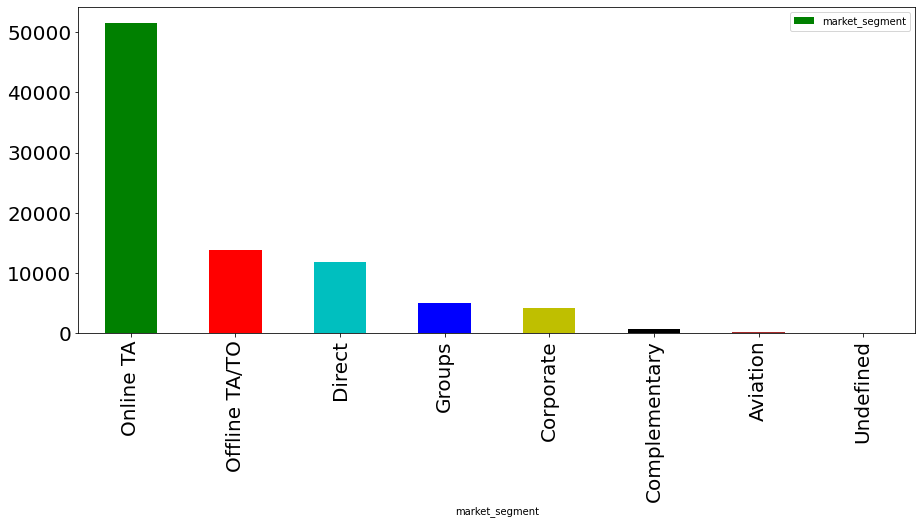

In [ ]:
market_segment_df = pd.DataFrame(df['market_segment'])
market_segment_df_data = market_segment_df.groupby('market_segment')['market_segment'].count()
market_segment_df_data.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(15,6))
y = np.array([4,5,6])
market_segment_df_data.plot(kind = 'bar', color=['g', 'r', 'c', 'b', 'y', 'black', 'brown'], fontsize = 20,legend='True')


##### 1. Why did you pick the specific chart?

In this chart, we have seen market segment by which hotel has booked

##### 2. What is/are the insight(s) found from the chart?

Online TA has been used most frequently to book hotel by the guest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 it is creating positive business impact that guests are using Online TA market segment as most prefered to book hotels.

#### Chart - 10

Text(0.5, 1.0, 'Total Revenue')

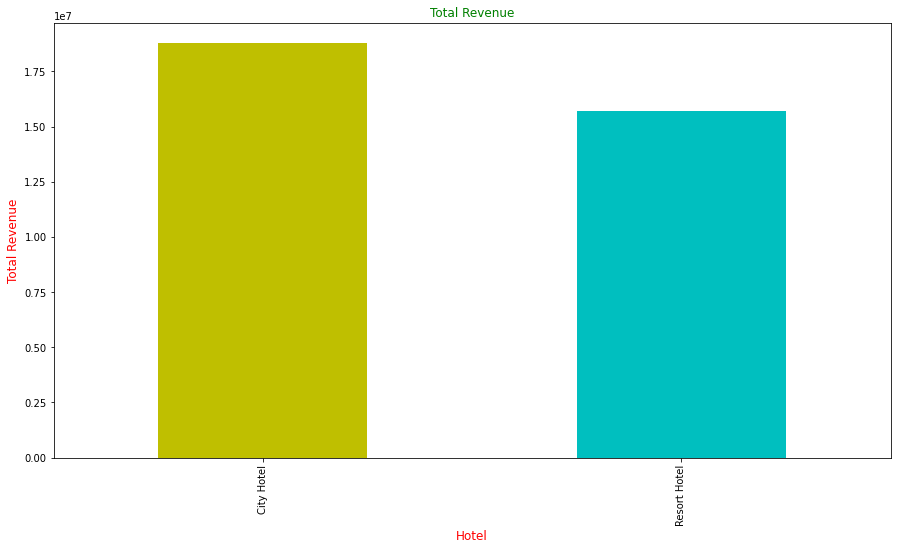

In [ ]:
 # visuvalization code 
plt.figure(figsize = (15,8))
hotel_wise_revenue = df.groupby('hotel')['revenue'].sum()
hotel_wise_revenue
ax = hotel_wise_revenue.plot(kind = 'bar', color = ('y', 'c'))
plt.xlabel("Hotel", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'red'})
plt.ylabel("Total Revenue", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'red'} )
plt.title("Total Revenue", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'} )
     

## 1 Why did you pick the specific chart?

Bar chart shows as frequency counts of value for the diffrent levels of a catagorial or nominal variable . bar chart shows other statics

To show the avarage adr of veach hotel type in a clear and fasiable way so we have used it

##2. What is/are the insight(s) found from the chart?

The city hotes has hieghest adr . This means city hotel are generatings more revenue than the resorts hotel

more than the adr more will be the revenue

#chart 11

Text(0.5, 1.0, 'Average ADR of Hotel')

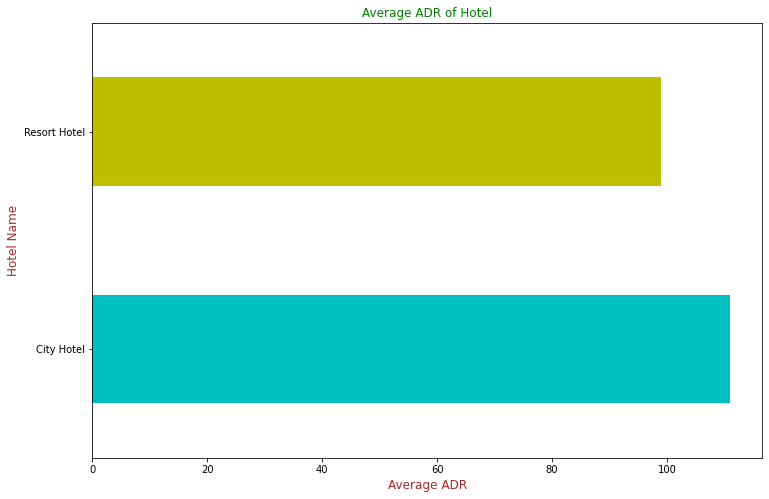

In [ ]:
# visualizations code
average_adr = df.groupby('hotel')['adr'].mean()
average_adr
plt.subplots(figsize=(12, 8))
average_adr.plot(kind = 'barh', color = ('c', 'y'))
plt.xlabel("Average ADR", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Hotel Name", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )
plt.title("Average ADR of Hotel", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'} )
     

##### 1. Why did you pick the specific chart?

To specify the average ADR for both hotels



##### 2. What is/are the insight(s) found from the chart?

As we can see the average ADR of City hotel is higher than Resort hotel, so the profit and revenue will be higher for city hotel

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we can do more advertising for City hotel to get more customer, which result higher profit

#### Chart - 12

<Axes: xlabel='total_stay_in_nights', ylabel='adr'>

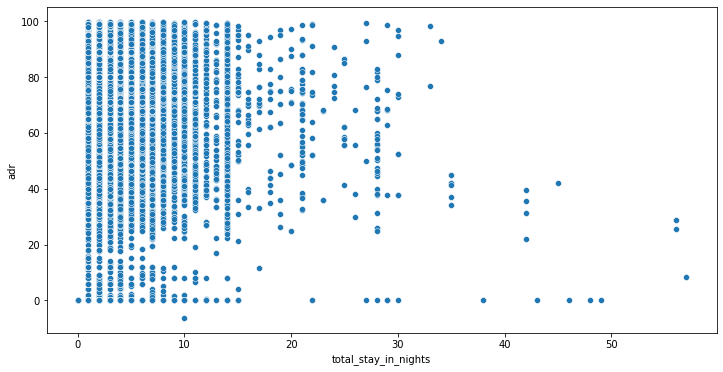

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay_in_nights', data = df[df['adr'] < 100])

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

## Chart - 13

meal               BB     FB      HB      SC  Undefined
hotel                                                  
City Hotel    41229.0   11.0  2791.0  9397.0        NaN
Resort Hotel  26749.0  349.0  6294.0    84.0      492.0

<Figure size 1200x1000 with 0 Axes>

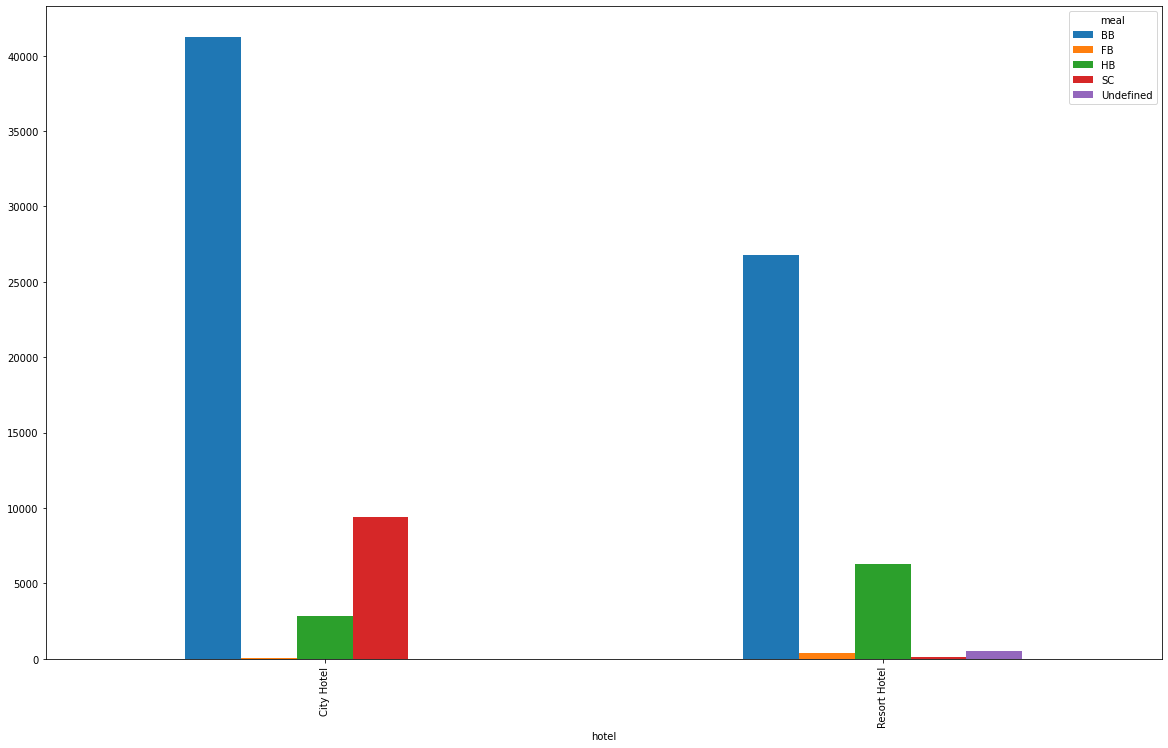

In [ ]:
# Chart - 14 visualization code
plt.figure(figsize = (12,10), dpi = 100)
hotel_wise_meal = df.groupby(['hotel', 'meal'])['meal'].count().unstack()
hotel_wise_meal.plot(kind ='bar', figsize = (20,12))
hotel_wise_meal

##### 1. Why did you pick the specific chart?

To show the meal preferance of the guest hotel-wise

##### 2. What is/are the insight(s) found from the chart?

As we can see, BB (Bed & breakfast) meal is most prefered by guests in both the hotels. So Hotel can give more delisious dishes in this meal to get customer repeat & attaract new customer

As we can see, BB (Bed & breakfast) meal is most prefered by guests in both the hotels. So Hotel can give more delisious dishes in this meal to get customer repeat & attaract new customer

##chat - 14

Text(0.5, 1.0, 'co-relation of the columns')

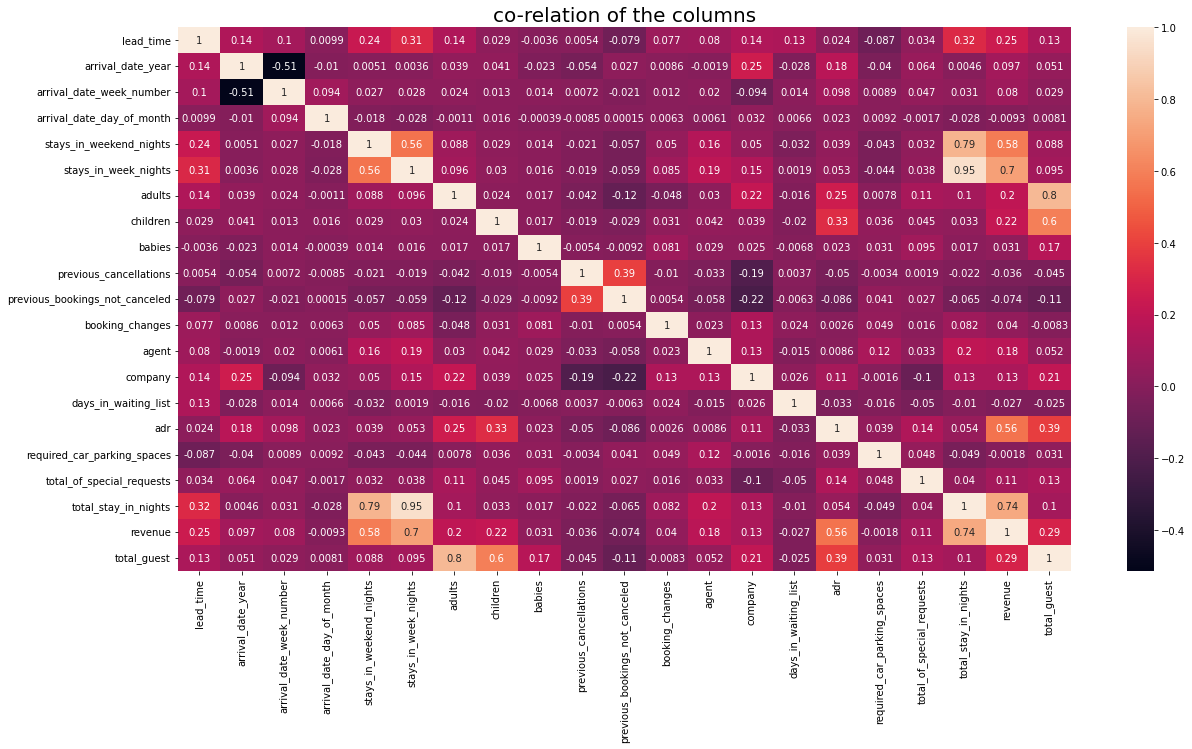

In [ ]:
#chat  visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('co-relation of the columns',fontsize=20)

##1. Why did you pick the specific chart

A correlation is a table showing correlation coefficient between variable each cell in the table shows the correalation b/w two variable A correlation matrix is used to summarised data

##2. What is/are the insight(s) found from the chart?

customers csn unlikly to cancel thier bookings they dont get the same room as per receved room adults,childrean,babies correalted to each other

##chart- 15

## pair plot

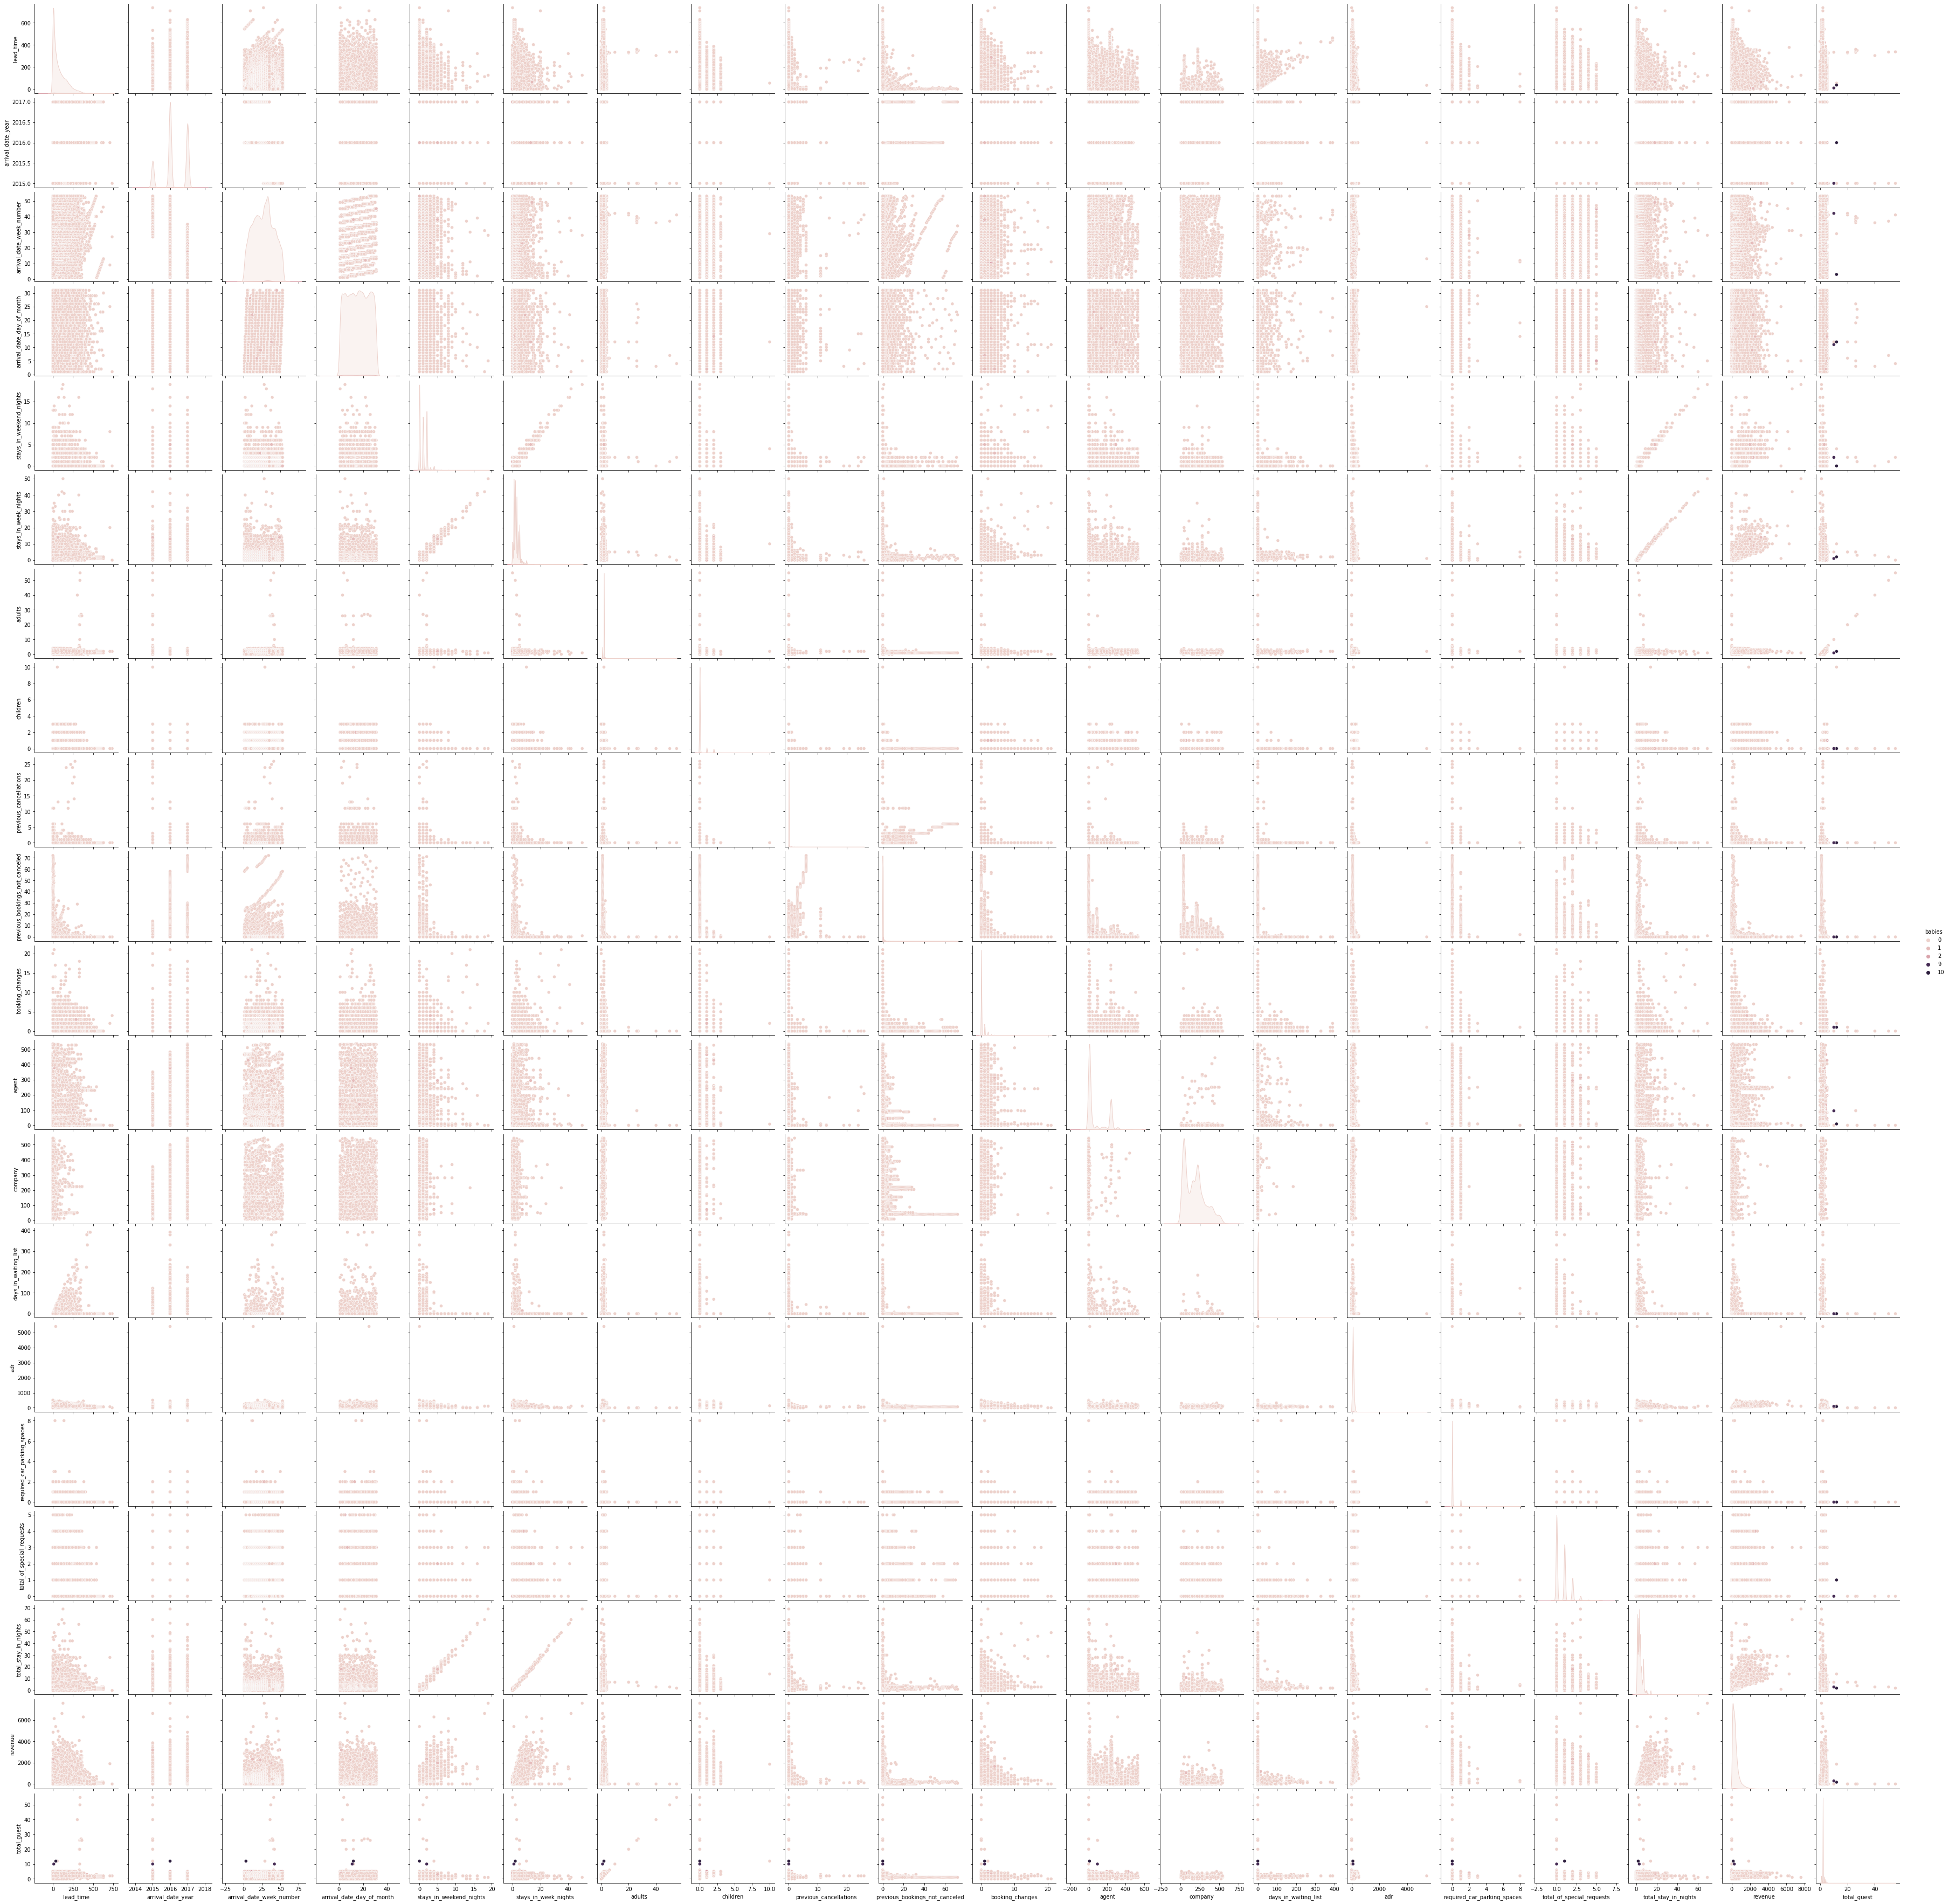

In [ ]:
#chart - 16 visualization code
sns.pairplot(df,hue="babies")

##Why did you pick the specific chart?

pair plot is used to understand the best set of features to explain b/w two variable  it also helps to form some simple classification modelsby drwaing some simple lines

we have found that how many babies are with diffrent types of columns

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.



1.For hotel business to flourish few things which we need to consider is high revenue generation, customers satisfaction and employeee retention.

2.We are able achieve the same by showing the client which are the months which are high in revenue generation by pie chart distribution

3.Increasing the revenue achieved by bar chart distribution of which typre room are most reserved and what are the months likely for visitors

4.So for these the client can be well prepare in advance so that minimum grievances would be faced by clients in long run and would help in further enhancement of their hospitality.

5.Outliers like higher the visitor then adr has reduced drastically was shown in scattered plot so in off season client can engage with offices for bulk booking this will aslo help extra revenue generation

6.We are able to show the trend of arrivals of visitor at client locations through which client engaged visitos well advance for there entaertainment and leisure activities

7.We where also able to co relate the values showing the max and min percentage between them so that the percenytage lying those numbers can be enhanced by various medium

# **Conclusion**

1.City Hotel seems to be more preferred among travellers and it also generates more revenue & profit.

2.Most number of bookings are made in July and August as compared rest of the months.

3.Room Type A is the most preferred room type among travellers.

4.Most number of bookings are made from Portugal & Great Britain.

5.Most of the guest stays for 1-4 days in the hotels.

6.City Hotel retains more number of guests.

7.Around one-fourth of the total bookings gets cancelled. More cancellations are from City Hotel.

8.New guest tends to cancel bookings more than repeated customers.

9.Lead time, number of days in waiting list or assignation of reserved room to customer does not affect cancellation of bookings.

10.Corporate has the most percentage of repeated guests while TA/TO has the least whereas in the case of cancelled bookings TA/TO has the most percentage while Corporate has the least.

11.The length of the stay decreases as ADR increases probably to reduce the cost.